In [288]:
import librosa
import numpy as np
import scipy.stats

WE EXTRACT AROUND 40 AUDIO FEATUES USING BELOW CODE

**WE RUN THIS AFTER RUNNING YT_AUTOMATE.ipynb file**

In [289]:
x, sr = librosa.load('/Users/suranjanachowdhury/Downloads/wav1/Boeing CEO apologizes to crash victims families.wav')
filename ='/Users/suranjanachowdhury/Downloads/wav1/Boeing CEO apologizes to crash victims families.wav'

In [290]:
#Function to calculate stats of frequencies
def describe_freq(x, sr):
    # Compute the FFT frequencies
    freqs = np.fft.fftfreq(x.size, d=1/sr)

    # Compute the statistics
    mean = np.mean(freqs)
    std = np.std(freqs)
    maxv = np.amax(freqs)
    minv = np.amin(freqs)
    median = np.median(freqs)
    skew = scipy.stats.skew(freqs)
    kurt = scipy.stats.kurtosis(freqs)
    q1 = np.quantile(freqs, 0.25)
    q3 = np.quantile(freqs, 0.75)
    mode = scipy.stats.mode(freqs)[0][0]
    iqr = scipy.stats.iqr(freqs)
    
    # Additional statistical features
    rangev = maxv - minv
    var = np.var(freqs)
    mad = np.median(np.abs(freqs - np.median(freqs)))

    result_dict = {
        'mean_freq': mean,
        'std': std,
        'max': maxv,
        'min': minv,
        'median': median,
        'skewness': skew,
        'kurtosis': kurt,
        'q1': q1,
        'q3': q3,
        'mode': mode,
        'iqr': iqr,
        'range': rangev,
        'variance': var,
        'mad': mad
    }

    return result_dict


In [291]:
#x, sr = librosa.load('/Users/suranjanachowdhury/Downloads/wav/output_fb.wav')
result = describe_freq(x, sr)
print(result)


/var/folders/xx/rbbr4jzx5d139mngn53bcc4c0000gn/T/ipykernel_78400/2896078798.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(freqs)[0][0]


{'mean_freq': -0.005805852298592508, 'std': 6365.286717814742, 'max': 11024.988388295402, 'min': -11025.0, 'median': -0.0058058522991175105, 'skewness': -3.095816744043696e-16, 'kurtosis': -1.2000000000006659, 'q1': -5512.5029029261495, 'q3': 5512.491291221551, 'mode': -11025.0, 'iqr': 11024.994194147701, 'range': 22049.988388295402, 'variance': 40516874.99998877, 'mad': 5512.5}


In [292]:
#energy
def rmse(x):
    result_dict = {
        'rmse': np.sqrt(np.sum(x**2))
    }
    return result_dict

# Example usage:
#x, sr = librosa.load('/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav')
result = rmse(x)
print(result)


{'rmse': 72.24521}


In [293]:
#rmse
def rmse(x):
    result_dict = {
        'rmse_mean': np.sqrt(np.mean(x**2))
    }
    return result_dict

# Example usage:
#x, sr = librosa.load('/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav')
result = rmse(x)
print(result)

{'rmse_mean': 0.05242673}


In [294]:
def count_zero_crossings(x):
    zero_crossings_count = np.sum(librosa.zero_crossings(x, pad=False))
    result_dict = {
        'zero_crossings': zero_crossings_count
    }
    return result_dict
result = count_zero_crossings(x)
print(result)

{'zero_crossings': 270440}


In [295]:
import librosa
#tempo
def compute_tempo(x, sr):
    onset_env = librosa.onset.onset_strength(y=x, sr=sr)
    tempo_result = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
    
    result_dict = {
        'tempo': tempo_result
    }
    return result_dict

# Example usage:
#x, sr = librosa.load('/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav')
result = compute_tempo(x, sr)
print(result)


/var/folders/xx/rbbr4jzx5d139mngn53bcc4c0000gn/T/ipykernel_78400/770088828.py:5: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo_result = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]


{'tempo': 103.359375}


In [296]:
#compute MFCC function
def compute_mfcc(x, sr):
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    
    result_dict = {
        'mfcc': mfcc.tolist()
    }
    return result_dict

# Example usage:
#ilename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_mfcc(x, sr)
print(result)


{'mfcc': [[-595.81494140625, -584.5146484375, -557.6091918945312, -552.4129028320312, -558.968505859375, -490.4919738769531, -357.5101318359375, -295.1922912597656, -234.16018676757812, -191.25088500976562, -180.13487243652344, -202.92384338378906, -272.899658203125, -383.6624450683594, -345.3838806152344, -251.08807373046875, -221.35015869140625, -210.4471893310547, -231.32223510742188, -244.0840301513672, -189.40164184570312, -165.04603576660156, -159.9100341796875, -217.66384887695312, -275.9124755859375, -259.03399658203125, -240.41497802734375, -241.6601104736328, -253.57142639160156, -249.4514617919922, -250.52420043945312, -282.75531005859375, -331.74981689453125, -283.05914306640625, -201.91456604003906, -189.89260864257812, -201.01271057128906, -201.3063507080078, -201.20062255859375, -198.28607177734375, -186.66490173339844, -170.44769287109375, -149.4093017578125, -148.95521545410156, -157.7809600830078, -177.1084442138672, -190.96966552734375, -176.89122009277344, -189.4082

In [297]:
#Limiting MFCC

def compute_limited_mfcc(x, sr, num_coefficients=10):
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    
    # Limit the number of coefficients to the desired value
    limited_mfcc = mfcc[:num_coefficients, :]
    
    result_dict = {
        'limited_mfcc': limited_mfcc.tolist()
    }
    return result_dict

# Example usage:
# filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
# x, sr = librosa.load(filename)

# Specify the number of coefficients you want (e.g., 10)
num_coefficients = 5

result = compute_limited_mfcc(x, sr, num_coefficients)
print(result)


{'limited_mfcc': [[-595.81494140625, -584.5146484375, -557.6091918945312, -552.4129028320312, -558.968505859375, -490.4919738769531, -357.5101318359375, -295.1922912597656, -234.16018676757812, -191.25088500976562, -180.13487243652344, -202.92384338378906, -272.899658203125, -383.6624450683594, -345.3838806152344, -251.08807373046875, -221.35015869140625, -210.4471893310547, -231.32223510742188, -244.0840301513672, -189.40164184570312, -165.04603576660156, -159.9100341796875, -217.66384887695312, -275.9124755859375, -259.03399658203125, -240.41497802734375, -241.6601104736328, -253.57142639160156, -249.4514617919922, -250.52420043945312, -282.75531005859375, -331.74981689453125, -283.05914306640625, -201.91456604003906, -189.89260864257812, -201.01271057128906, -201.3063507080078, -201.20062255859375, -198.28607177734375, -186.66490173339844, -170.44769287109375, -149.4093017578125, -148.95521545410156, -157.7809600830078, -177.1084442138672, -190.96966552734375, -176.89122009277344, -

In [298]:
#Other stats
def compute_summary_stats(x, sr):
    feature = librosa.feature.mfcc(y=x, sr=sr)

    summary_stats = {
        'mean_mfcc': np.mean(feature),
        'variance': np.var(feature),
        'quartiles': np.percentile(feature, [25, 50, 75], axis=None),
        'min': np.min(feature),
        'max': np.max(feature),
        'median': np.median(feature)
    }

    return summary_stats

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_summary_stats(x, sr)
print(result)


{'mean_mfcc': -21.401184, 'variance': 7634.384, 'quartiles': array([-15.86590719,  -7.17388606,  -0.60451165]), 'min': -595.81494, 'max': 205.87146, 'median': -7.1738863}


In [299]:
#MFCC WITH deltas
def compute_mfcc_with_deltas(x, sr):
    mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
    delta = librosa.feature.delta(mfcc)
    delta_delta = librosa.feature.delta(mfcc, order=2)

    result_dict = {
        'mfcc_mean': np.mean(mfcc, axis=1).tolist(),
        'delta_mean': np.mean(delta, axis=1).tolist(),
        'delta_delta_mean': np.mean(delta_delta, axis=1).tolist()
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_mfcc_with_deltas(x, sr)
print(result)


{'mfcc_mean': [-360.2019348144531, 74.19297790527344, -5.224780082702637, 11.49494457244873, -2.2886037826538086, -1.5857821702957153, -18.20665168762207, -11.748380661010742, -17.683677673339844, -14.829618453979492, -12.422399520874023, -8.212387084960938, -10.607698440551758], 'delta_mean': [0.027148336172103882, 0.008241914212703705, -0.008466048166155815, -0.0022621473763138056, -0.0023410359863191843, -0.0008341402863152325, -0.0033792515750974417, 0.0015768676530569792, -0.002296705497428775, -0.00510796345770359, 0.0021424496080726385, 0.0021560906898230314, 0.0025177490897476673], 'delta_delta_mean': [0.004784713499248028, -0.0053097037598490715, -0.006056215148419142, -0.0002633529657032341, -0.0009372628410346806, 0.0004725807229988277, -0.001069344929419458, 0.0016776404809206724, 0.001127104158513248, -0.0008104422595351934, 0.0009550665854476392, 0.0002799779758788645, 0.0008385583059862256]}


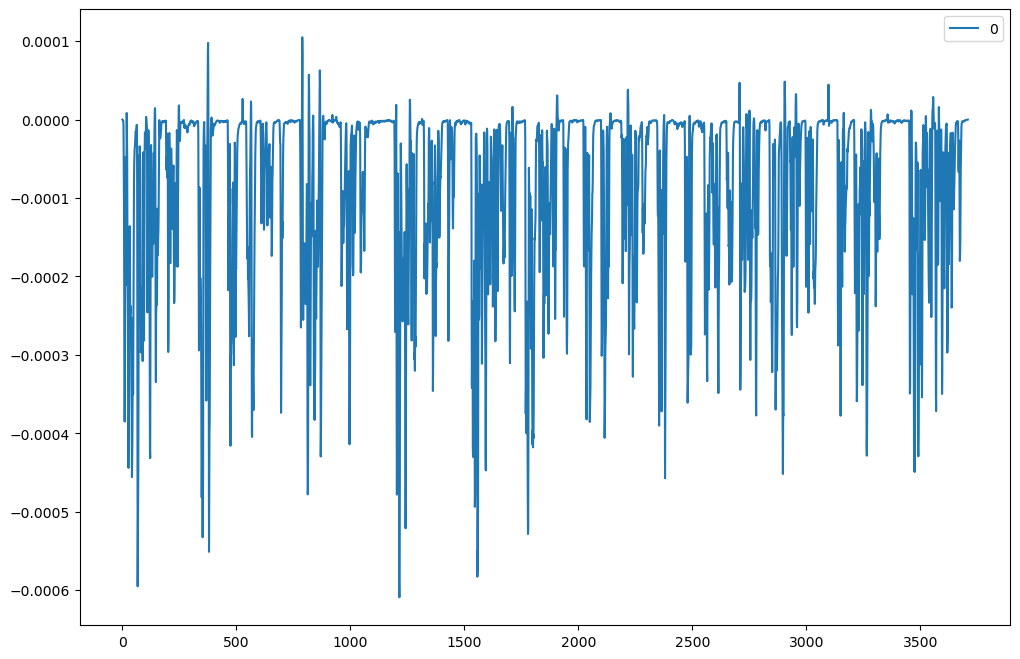

{'poly_feature_0': [-4.806232150159761e-08, -6.484114009357016e-07, -1.4708433551018718e-06, -1.6686593596894953e-06, -1.5017961446065585e-06, -8.362206949780848e-06, -5.617179864529077e-05, -0.00010390413774053825, -0.0002071821315915498, -0.000328552581098518, -0.0003850297481336858, -0.00032796243673343214, -0.0001849493313822423, -4.776292193481713e-05, -5.698631508087367e-05, -0.00017014064212501128, -0.00021101131130689578, -0.0001376601402710917, -3.7705380850048586e-05, 8.41020903867744e-06, -1.3460726255418282e-05, -4.235444996029055e-05, -0.00012819023300335167, -0.0002211295368281857, -0.0002554147637110911, -0.00037692589652148293, -0.00044240506414926017, -0.0004440953685490491, -0.00039382022801537884, -0.0003729129178907725, -0.00033349468967554534, -0.00023123857307529516, -0.000135916085532034, -0.00015661603363871618, -0.0002398114851645669, -0.00024744431342541224, -0.00023759728344541052, -0.00025859848291466655, -0.00026623893698928333, -0.00025261350805936384, -0.

In [300]:
import matplotlib.pyplot as plt

def compute_poly_features(x):
    poly_features = librosa.feature.poly_features(y=x, order=1)[0]

    result_dict = {
        'poly_feature_0': poly_features.tolist(),
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_poly_features(x)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(result['poly_feature_0'], label="0")
plt.legend()
plt.show()

print(result)


In [301]:
def compute_poly_features(x):
    poly_features = librosa.feature.poly_features(y=x, order=1)[0]

    result_dict = {
        'poly_feature_0_mean': np.mean(poly_features),
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_poly_features(x)

print(result)


{'poly_feature_0_mean': -8.190423064735078e-05}


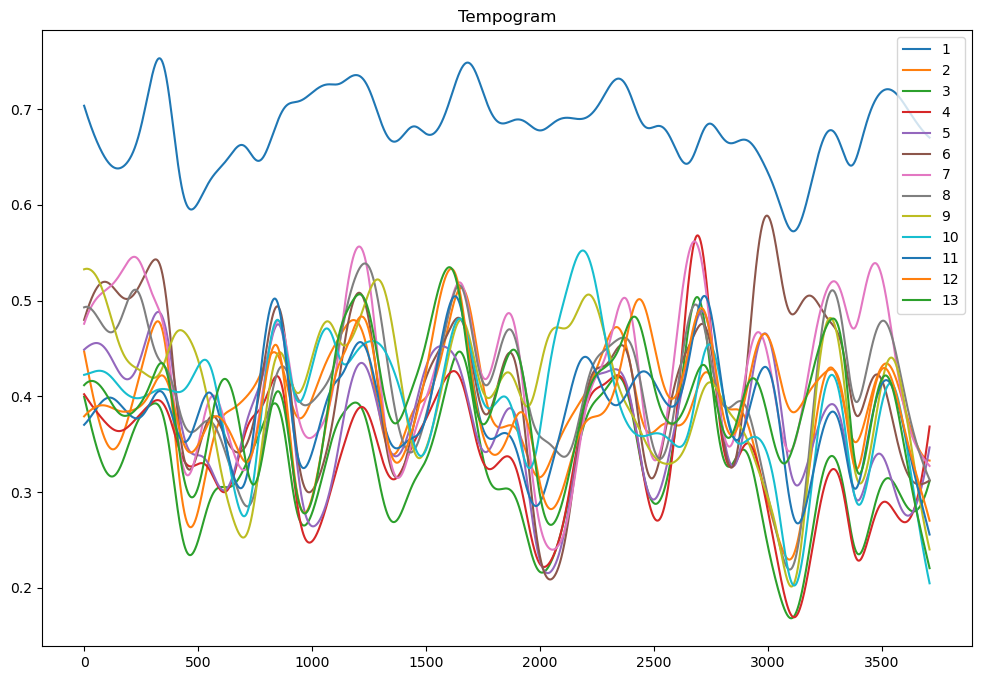

{'tempogram_1': [0.7035339471263516, 0.7027735066919454, 0.7020148203514693, 0.701258089681992, 0.7005035055547157, 0.6997512458316859, 0.6990014764507155, 0.698254352022112, 0.6975100163061174, 0.696768602815274, 0.6960302352907692, 0.6952950275508838, 0.6945630847256241, 0.6938345039464172, 0.693109374860211, 0.6923877800810118, 0.691669795604475, 0.6909554912018466, 0.6902449305792477, 0.689538170047539, 0.6888352595508526, 0.6881362436173234, 0.6874411618531673, 0.6867500492987756, 0.6860629366887956, 0.6853798499919725, 0.6847008107236212, 0.684025836606607, 0.683354941995474, 0.6826881381732884, 0.6820254337506816, 0.6813668350057032, 0.6807123461325697, 0.6800619694475357, 0.6794157055820249, 0.6787735536669746, 0.6781355116008344, 0.6775015763466685, 0.6768717442658306, 0.6762460113967765, 0.6756243736667624, 0.6750068270540609, 0.674393367705731, 0.6737839920299923, 0.6731786967632437, 0.6725774790155813, 0.6719803362344895, 0.6713872664887588, 0.6707982687886413, 0.6702133431

In [302]:
#Checking tempogram
def compute_tempogram(x, sr, hop_length=512):
    oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

    result_dict = {}
    for i in range(1, 14):
        result_dict[f'tempogram_{i}'] = tempogram[i].tolist()

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_tempogram(x, sr, hop_length=512)

# Plotting the results
plt.figure(figsize=(12, 8))
for i in range(1, 14):
    plt.plot(result[f'tempogram_{i}'], label=i)
plt.legend()
plt.title("Tempogram")
plt.show()

print(result)


{'tempogram_mean_1': 0.6789220388079936, 'tempogram_mean_2': 0.38793527755023943, 'tempogram_mean_3': 0.3247027339158785, 'tempogram_mean_4': 0.3368910350549276, 'tempogram_mean_5': 0.3716334595472438, 'tempogram_mean_6': 0.41215121614453964, 'tempogram_mean_7': 0.4253181945626747, 'tempogram_mean_8': 0.40992018478907205, 'tempogram_mean_9': 0.4027146003076897, 'tempogram_mean_10': 0.3922042608109984, 'tempogram_mean_11': 0.384998600646133, 'tempogram_mean_12': 0.39385430315734005, 'tempogram_mean_13': 0.39340238402285493}


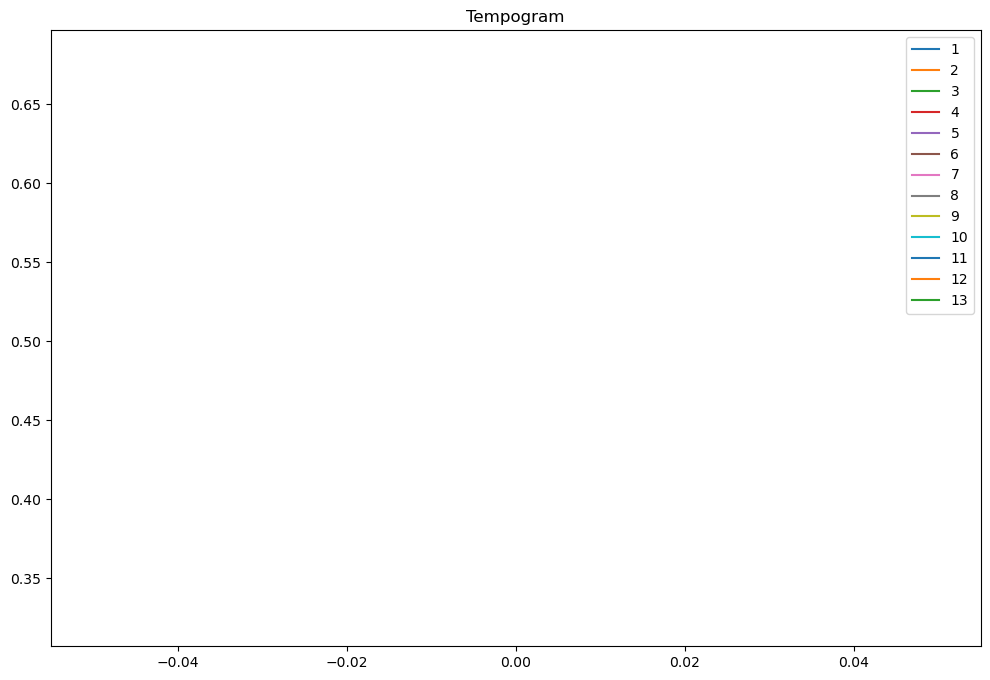

In [303]:
#Data points for tempogram
def compute_tempogram(x, sr, hop_length=512):
    oenv = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
    tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

    result_dict = {
        f'tempogram_mean_{i}': np.mean(tempogram[i]) for i in range(1, 14)
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_tempogram(x, sr, hop_length=512)

# Print the results
print(result)

# Plotting the tempogram for visualization
plt.figure(figsize=(12, 8))
for i in range(1, 14):
    plt.plot(result[f'tempogram_mean_{i}'], label=i)
plt.legend()
plt.title("Tempogram")
plt.show()


In [304]:
#spectral frequency computation as discussed as a use case in report
def compute_spectral_features(x, sr):
    spec_centroid = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=x, sr=sr))
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=x))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))

    result_dict = {
        'spec_centroid_mean': spec_centroid,
        'spectral_bandwidth_mean': spectral_bandwidth,
        'spectral_contrast_mean': spectral_contrast,
        'spectral_flatness_mean': spectral_flatness,
        'spectral_rolloff_mean': spectral_rolloff,
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = compute_spectral_features(x, sr)

# Print the results
print(result)


{'spec_centroid_mean': 2576.0486132479996, 'spectral_bandwidth_mean': 2364.4261593043534, 'spectral_contrast_mean': 21.875777350905633, 'spectral_flatness_mean': 0.05764727, 'spectral_rolloff_mean': 5030.159733397648}


In [305]:
def extract_fundamental_frequency(x, sr):
    # Extract the pitch (fundamental frequency) using the yin algorithm
    pitches, magnitudes = librosa.core.piptrack(y=x, sr=sr)
    
    # Calculate the median pitch
    pitch_median = np.median(pitches)

    result_dict = {
        'fundamental_frequency': pitch_median,
    }

    return result_dict

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#x, sr = librosa.load(filename)
result = extract_fundamental_frequency(x, sr)

# Print the result
print(result)


{'fundamental_frequency': 0.0}


In [306]:
#Jitter calculate
def extract_jitter(signal, sample_rate):
    try:
        # Calculate pitch using zero-crossings
        zero_crossings = np.where(np.diff(np.sign(signal)))[0]
        pitch_periods = np.diff(zero_crossings) / sample_rate

        # Calculate jitter as the absolute difference between consecutive pitch periods
        jitter = np.abs(np.diff(pitch_periods))

        # Calculate mean and standard deviation of jitter
        mean_jitter = np.mean(jitter)
        std_jitter = np.std(jitter)
        
        # Additional jitter features
        max_jitter = np.max(jitter)
        min_jitter = np.min(jitter)
        median_jitter = np.median(jitter)
        skewness_jitter = np.mean((jitter - mean_jitter) ** 3) / (std_jitter ** 3)
        kurtosis_jitter = np.mean((jitter - mean_jitter) ** 4) / (std_jitter ** 4)
        q1_jitter = np.percentile(jitter, 25)
        q3_jitter = np.percentile(jitter, 75)

        result_dict = {
            'mean_jitter': mean_jitter,
            'std_jitter': std_jitter,
            'max_jitter': max_jitter,
            'min_jitter': min_jitter,
            'median_jitter': median_jitter,
            'skewness_jitter': skewness_jitter,
            'kurtosis_jitter': kurtosis_jitter,
            'q1_jitter': q1_jitter,
            'q3_jitter': q3_jitter,
        }

        return result_dict

    except Exception as e:
        return {'error': str(e)}

# Example usage:
#filename = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
signal, sample_rate = librosa.load(filename)
result = extract_jitter(signal, sample_rate)

# Print the result
print(result)

{'mean_jitter': 0.00025654587394444736, 'std_jitter': 0.0003922411747674589, 'max_jitter': 0.004625850340136055, 'min_jitter': 0.0, 'median_jitter': 9.070294784580499e-05, 'skewness_jitter': 2.8486913618931986, 'kurtosis_jitter': 13.385971191109105, 'q1_jitter': 4.5351473922902495e-05, 'q3_jitter': 0.00031746031746031746}


In [307]:
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.preprocessing import StandardScaler

# Load audio file (replace 'your_audio_file.wav' with the actual filename)
#audio_file = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
y, sr = librosa.load(filename)

# Extract MFCC features and reshape
X_normalized = StandardScaler().fit_transform(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T)

# Apply unsupervised dictionary learning
dico_X = MiniBatchDictionaryLearning(n_components=50, alpha=1, n_iter=500).fit_transform(X_normalized)

# Output the result as a dictionary
result_dict = {'dico_X': dico_X.tolist()}

print(result_dict)


{'dico_X': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5617814902768075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.014009462154708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6919444190863397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [308]:
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.preprocessing import StandardScaler
# Load audio file (replace 'your_audio_file.wav' with the actual filename)
# audio_file = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
y, sr = librosa.load(filename)

# Extract MFCC features and reshape
X_normalized = StandardScaler().fit_transform(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T)

# Apply unsupervised dictionary learning
dico_X = MiniBatchDictionaryLearning(n_components=50, alpha=1, n_iter=500).fit_transform(X_normalized)

# Limit the number of elements in dico_X to, for example, the first 10 elements
limited_dico_X = dico_X[:, :10]

# Output the result as a dictionary
result_dict = {'limited_dico_X': limited_dico_X.tolist()}

print(result_dict)


{'limited_dico_X': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [309]:
#Meta 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def extract_age_features(audio_path):
    y, sr = librosa.load(audio_path)
    # Extract basic features (you can add more features based on your requirements)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    
    # Combine features into a dictionary
    features_dict = {
        'Meta_features-'
        'mfcc_mean': mfcc.mean(axis=1).tolist(),
        'spectral_centroid_mean': spectral_centroid.mean().tolist()
    }
    
    return features_dict

# Example usage:
#audio_path_1 = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
#audio_path_2 = '/path/to/audio/old_sample.wav'
audio_path_1=filename 
features_1 = extract_age_features(audio_path_1)
#features_2 = extract_age_features(audio_path_2)

print(features_1)
#print(features_2)

{'Meta_features-mfcc_mean': [-360.2019348144531, 74.19297790527344, -5.224780082702637, 11.49494457244873, -2.2886037826538086, -1.5857821702957153, -18.20665168762207, -11.748380661010742, -17.683677673339844, -14.829618453979492, -12.422399520874023, -8.212387084960938, -10.607698440551758], 'spectral_centroid_mean': 2576.0486132479996}


DO NOT RUN BEYOND THIS

In [ ]:
#ignore this AS this is a use case and not feature
import numpy as np
import librosa
from sklearn.cluster import KMeans

def extract_and_cluster(audio_path, num_clusters=2):
    # Extract MFCC features
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features = mfcc.flatten().reshape(1, -1)

    # Train K-means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features)

    # Return cluster labels
    return kmeans.labels_

# Example usage:
audio_path = '/Users/suranjanachowdhury/Downloads/output_audio_samsung.wav'
cluster_labels = extract_and_cluster(audio_path)

print(f'Cluster Labels: {cluster_labels}')
